# Imports

In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
from tensorflow import keras
import os
import json
from skimage.exposure import match_histograms

from google.colab.patches import cv2_imshow

from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Mounting on google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path_babak = "gdrive/MyDrive/CV_course/project/"

# Unzipping the dataset and patterns

In [ ]:
# !unzip gdrive/My\ Drive/Dataset/Dataset.zip  -d "/content/dataset"
!unzip gdrive/MyDrive/CV_course/project/Dataset/Dataset.zip  -d "gdrive/MyDrive/CV_course/project/Dataset/dataset"

Archive:  gdrive/MyDrive/CV_course/project/Dataset/Dataset.zip
 extracting: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644359422.816138.jpg  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644359422.816138.json  
 extracting: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644360063.82364.jpg  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644360063.82364.json  
 extracting: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644362482.7094185.jpg  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644362482.7094185.json  
 extracting: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644368971.6154966.jpg  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644368971.6154966.json  
 extracting: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644369207.922902.jpg  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/dataset/1644369207.922902.json  
 extracting: gdrive/MyDrive/CV_course/project/Dataset/dataset/16443696

In [ ]:
# !unzip gdrive/My\ Drive/Dataset/Patterns.zip  -d "/content/pattern"
!unzip gdrive/MyDrive/CV_course/project/Dataset/Patterns.zip  -d "gdrive/MyDrive/CV_course/project/Dataset/patterns"

Archive:  gdrive/MyDrive/CV_course/project/Dataset/Patterns.zip
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/AYLIN.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/Orlando_60x60-1.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/Orlando_60x60-10.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/Orlando_60x60-2.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/Orlando_60x60-3.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/Orlando_60x60-5.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/Orlando_60x60-6.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/Orlando_60x60-7.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/Orlando_60x60-8.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/Orlando_60x60-9.tif  
  inflating: gdrive/MyDrive/CV_course/project/Dataset/patterns/REJINA.tif  
  inflating: gdrive

# Loading Dataset

In [ ]:
pth= f"{path_babak}Dataset/dataset"

images = []
labels = []
skip = False

for file in os.listdir(pth):
  if skip:
    skip = False
    continue
  if file.endswith(".jpg"):
    images.append(cv2.imread(os.path.join(pth,file))[74:1590,74:1590])
  elif file.endswith(".png"):
    images.append(cv2.imread(os.path.join(pth,file))[74:1590,74:1590])
  elif file.endswith(".json"):
    labels.append(json.load(open(os.path.join(pth,file))))
  elif file.endswith(".bmp"):
    skip = True
    continue

In [ ]:
labels[2]

{'version': '4.6.0',
 'flags': {},
 'shapes': [{'label': 'tarak',
   'points': [[601.4783935546875, 813.8779907226562],
    [388.26641845703125, 808.9151611328125],
    [282.0430603027344, 789.119384765625],
    [295.0075378417969, 770.232177734375],
    [534.6285400390625, 794.6077270507812],
    [599.3009033203125, 794.255859375]],
   'group_id': None,
   'shape_type': 'polygon',
   'flags': {}},
  {'label': 'tarak',
   'points': [[694.9871215820312, 859.1863403320312],
    [662.38427734375, 856.8690185546875],
    [660.9418334960938, 837.240966796875],
    [705.1431884765625, 845.6868286132812]],
   'group_id': None,
   'shape_type': 'polygon',
   'flags': {}},
  {'label': 'tarak',
   'points': [[459.2669372558594, 915.2210693359375],
    [378.5404052734375, 900.3571166992188],
    [382.8720703125, 879.6544189453125],
    [466.6935729980469, 891.7218627929688]],
   'group_id': None,
   'shape_type': 'polygon',
   'flags': {}},
  {'label': 'tarak',
   'points': [[717.2540283203125, 9

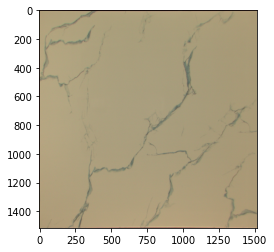

In [ ]:
plt.imshow(images[0])

# Loading Patterns

In [ ]:
pth= f"{path_babak}Dataset/patterns"
pattern_path=[]
for file in os.listdir(pth):
  if file.endswith(".tif"):
    pattern_path.append(os.path.join(pth,file))
patterns=[]
for im in pattern_path:
  patterns.append(cv2.imread(im))

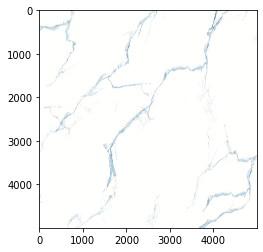

In [ ]:
plt.imshow(patterns[-1])

# Preprocessing

## Histogram Matching

In [ ]:
new_patterns = [None] * len(pattern_path)
pattern_visited = [False] * len(pattern_path)
for i in range(len(images)):
  reference = images[i]
  
  pattern_name = labels[i]['pattern']
  pattern_img = None
  for j in range(len(pattern_path)):
    if (not pattern_visited[j]) and pattern_path[j].split('/')[-1] == pattern_name:
      pattern_img = patterns[j]
      pattern_visited[j] = True
      source = pattern_img
      matched = match_histograms(source, reference, multichannel=True)
      new_patterns[j] = matched
      break

In [ ]:
del patterns, pattern_visited

# Finding KeyPoints

In [ ]:
def find_rotation_degree(good_points, kp_1, kp_2):
  # kp_1[i].pt -> mokhtasat dar aks kashi
  # kp_2[i].pt -> mokhtasat dar pattern
  # good_points[i].queryIdx -> keypoint dar kashi
  # good_points[i].trainIdx -> keypoint dar pattern

  degrees = {'0' : 0, '90': 0, '180' : 0, '270' : 0}
  for good_point in good_points:
    key1_index = good_point.queryIdx
    key2_index = good_point.trainIdx

    x_1, y_1 = kp_1[key1_index].pt
    x_2, y_2 = kp_2[key2_index].pt

    if x_1 < 800 and y_1 < 800:
      if x_2 < 2500 and y_2 < 2500:
        degrees['0'] += 1
      elif x_2 < 2500 and y_2 > 2500:
        degrees['90'] += 1
      elif x_2 > 2500 and y_2 > 2500:
        degrees['180'] += 1
      elif x_2 > 2500 and y_2 < 2500:
        degrees['270'] += 1
    # ==============================
    elif x_1 < 800 and y_1 > 800:
      if x_2 < 2500 and y_2 < 2500:
        degrees['270'] += 1
      elif x_2 < 2500 and y_2 > 2500:
        degrees['0'] += 1
      elif x_2 > 2500 and y_2 > 2500:
        degrees['90'] += 1
      elif x_2 > 2500 and y_2 < 2500:
        degrees['180'] += 1
    # ===============================
    elif x_1 > 800 and y_1 > 800:
      if x_2 < 2500 and y_2 < 2500:
        degrees['180'] += 1
      elif x_2 < 2500 and y_2 > 2500:
        degrees['270'] += 1
      elif x_2 > 2500 and y_2 > 2500:
        degrees['0'] += 1
      elif x_2 > 2500 and y_2 < 2500:
        degrees['90'] += 1
    # ==============================
    elif x_1 < 800 and y_1 > 800:
      if x_2 < 2500 and y_2 < 2500:
        degrees['90'] += 1
      elif x_2 < 2500 and y_2 > 2500:
        degrees['180'] += 1
      elif x_2 > 2500 and y_2 > 2500:
        degrees['270'] += 1
      elif x_2 > 2500 and y_2 < 2500:
        degrees['0'] += 1
  result = None
  # print(degrees)
  m = 0
  for k in degrees.keys():
    if degrees[k] > m:
      m = degrees[k]
      result = k
  return result

In [ ]:
# https://pysource.com/2018/07/20/find-similarities-between-two-images-with-opencv-and-python/
def find_keypoints(img1, img2):
  original = img1 # queryImage
  image_to_compare = img2 # trainImage
  height, width, c = original.shape

  sift = cv2.xfeatures2d.SIFT_create()
  kp_1, desc_1 = sift.detectAndCompute(original, None)
  kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)

  index_params = dict(algorithm=0, trees=5)
  search_params = dict()
  flann = cv2.FlannBasedMatcher(index_params, search_params)

  matches = flann.knnMatch(desc_1, desc_2, k=2)

  good_points = []
  ratio = 0.7
  for m, n in matches:
      if m.distance < ratio*n.distance:
          good_points.append(m)

  no_of_matches = len(good_points)
  # result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)

  deg = find_rotation_degree(good_points, kp_1, kp_2)
  return deg

In [ ]:
rotation_deg = []

for i in range(len(images)):
  img = images[i]
  
  pattern_name = labels[i]['pattern']
  for j in range(len(pattern_path)):
    if pattern_path[j].split('/')[-1] == pattern_name:
      pattern_img = new_patterns[j]
      deg = find_keypoints(img, pattern_img)
      rotation_deg.append(deg)


In [ ]:
result, deg = find_keypoints(images[2], new_patterns[-1])

{'0': 1, '90': 2, '180': 10, '270': 1}


In [ ]:
print(deg)

180


In [ ]:
cv2_imshow(result)

Output hidden; open in https://colab.research.google.com to view.

# Maching Image and Pattern

## Resizing

In [ ]:
scale = 1516/5000
patterns = []

for i in range(len(new_patterns)):
  if type(new_patterns[i]) != type(None):
    patterns.append(cv2.resize(new_patterns[i], dsize=(0,0), fx=scale, fy=scale))
  else:
    patterns.append(None)

In [ ]:
del new_patterns

## Rotation

In [ ]:
def rotate_image(img, deg):
  if deg == '90':
    return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

  elif deg == '270':
    return cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

  elif deg == '180':
    return cv2.rotate(img, cv2.ROTATE_180)

  else:
    return img

In [ ]:
rotated_patterns = []
for i in range(len(rotation_deg)):
  pattern_name = labels[i]['pattern']
  for j in range(len(pattern_path)):
    if pattern_path[j].split('/')[-1] == pattern_name:
      rotated_patterns.append(rotate_image(patterns[j], rotation_deg[i]))
      break

# Removing Pattern

## Morphology

In [ ]:
input_images = []
for i in range(len(images)):
  img = images[i]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
  bin1 = cv2.adaptiveThreshold(img,100,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,5)

  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
  kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))


  pat = cv2.cvtColor(rotated_patterns[i], cv2.COLOR_BGR2GRAY )
  bin2 = cv2.adaptiveThreshold(pat,100,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,5)

  eroded = cv2.erode(bin2,kernel,iterations=5)
  eroded2 = cv2.erode(eroded,kernel2,iterations=3)
  dilate = cv2.dilate(eroded2,kernel)
  opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel2,iterations=2)

  temp = cv2.subtract(opening, bin1)
  temp = cv2.resize(temp, dsize=(0,0), fx=224/1516, fy=224/1516)

  input_images.append(cv2.cvtColor(temp, cv2.COLOR_GRAY2BGR))

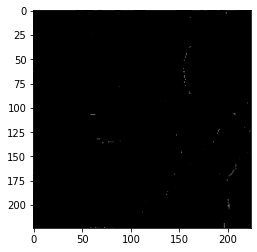

In [ ]:
plt.imshow(input_images[2])

# Detection

In [ ]:
del images

## Label Preprocessing (Masking)

In [ ]:
masked_labels = []

for i in range(len(labels)):
  mask = np.zeros((224, 224))
  for j in range(len(labels[i]['shapes'])):
    points = []
    for point in labels[i]['shapes'][j]['points']:
      points.append([int((point[0] - 74) * (224/1516)), int((point[1] - 74) * (224/1516))])
    cv2.fillPoly(mask, pts=[np.array(points)], color=(255, 255, 255))

  masked_labels.append(mask)

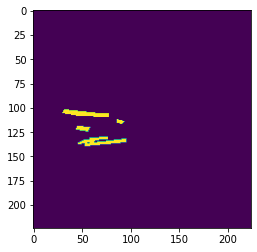

In [ ]:
plt.imshow(masked_labels[2])

In [ ]:
del masked_labels

## Model

In [ ]:
# coding: utf-8
'''
    - "ZF_UNET_224" Model based on UNET code from following paper: https://arxiv.org/abs/1505.04597
    - This model used to get 2nd place in DSTL competition: https://www.kaggle.com/c/dstl-satellite-imagery-feature-detection
    - For training used DICE coefficient: https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
    - Input shape for model is 224x224 (the same as for other popular CNNs like VGG or ResNet)
    - It has 3 input channels (to process standard RGB (BGR) images). You can change it with variable "INPUT_CHANNELS"
    - It trained on random image generator with random light shapes (ellipses) on dark background with noise (< 10%).
    - In most cases model ZF_UNET_224 is ok to be used without pretrained weights.
'''

__author__ = 'ZFTurbo: https://kaggle.com/zfturbo'

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import BatchNormalization
from keras.layers.core import SpatialDropout2D, Activation
from keras import backend as K
from keras.layers import concatenate
from keras.utils.data_utils import get_file

# Number of image channels (for example 3 in case of RGB, or 1 for grayscale images)
INPUT_CHANNELS = 3
# Number of output masks (1 in case you predict only one type of objects)
OUTPUT_MASK_CHANNELS = 1
# Pretrained weights
ZF_UNET_224_WEIGHT_PATH = 'https://github.com/ZFTurbo/ZF_UNET_224_Pretrained_Model/releases/download/v1.0/zf_unet_224.h5'


def preprocess_input(x):
    x /= 256
    x -= 0.5
    return x


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def double_conv_layer(x, size, dropout=0.0, batch_norm=True):
    axis = 3
    conv = Conv2D(size, (3, 3), padding='same')(x)
    if batch_norm is True:
        conv = BatchNormalization(axis=axis)(conv)
    conv = Activation('relu')(conv)
    conv = Conv2D(size, (3, 3), padding='same')(conv)
    if batch_norm is True:
        conv = BatchNormalization(axis=axis)(conv)
    conv = Activation('relu')(conv)
    if dropout > 0:
        conv = SpatialDropout2D(dropout)(conv)
    return conv


def ZF_UNET_224(dropout_val=0.2, weights=None):
    inputs = Input((224, 224, INPUT_CHANNELS))
    axis = 3
    filters = 32

    conv_224 = double_conv_layer(inputs, filters)
    pool_112 = MaxPooling2D(pool_size=(2, 2))(conv_224)

    conv_112 = double_conv_layer(pool_112, 2*filters)
    pool_56 = MaxPooling2D(pool_size=(2, 2))(conv_112)

    conv_56 = double_conv_layer(pool_56, 4*filters)
    pool_28 = MaxPooling2D(pool_size=(2, 2))(conv_56)

    conv_28 = double_conv_layer(pool_28, 8*filters)
    pool_14 = MaxPooling2D(pool_size=(2, 2))(conv_28)

    conv_14 = double_conv_layer(pool_14, 16*filters)
    pool_7 = MaxPooling2D(pool_size=(2, 2))(conv_14)

    conv_7 = double_conv_layer(pool_7, 32*filters)

    up_14 = concatenate([UpSampling2D(size=(2, 2))(conv_7), conv_14], axis=axis)
    up_conv_14 = double_conv_layer(up_14, 16*filters)

    up_28 = concatenate([UpSampling2D(size=(2, 2))(up_conv_14), conv_28], axis=axis)
    up_conv_28 = double_conv_layer(up_28, 8*filters)

    up_56 = concatenate([UpSampling2D(size=(2, 2))(up_conv_28), conv_56], axis=axis)
    up_conv_56 = double_conv_layer(up_56, 4*filters)

    up_112 = concatenate([UpSampling2D(size=(2, 2))(up_conv_56), conv_112], axis=axis)
    up_conv_112 = double_conv_layer(up_112, 2*filters)

    up_224 = concatenate([UpSampling2D(size=(2, 2))(up_conv_112), conv_224], axis=axis)
    up_conv_224 = double_conv_layer(up_224, filters, dropout_val)

    conv_final = Conv2D(OUTPUT_MASK_CHANNELS, (1, 1))(up_conv_224)
    conv_final = Activation('sigmoid')(conv_final)

    model = Model(inputs, conv_final, name="ZF_UNET_224")

    if weights == 'generator' and axis == 3 and INPUT_CHANNELS == 3 and OUTPUT_MASK_CHANNELS == 1:
        weights_path = get_file(
            'zf_unet_224_weights_tf_dim_ordering_tf_generator.h5',
            ZF_UNET_224_WEIGHT_PATH,
            cache_subdir='models',
            file_hash='203146f209baf34ac0d793e1691f1ab7')
        model.load_weights(weights_path)

    return model


In [ ]:
model = ZF_UNET_224(weights='generator')

In [ ]:
model.summary()

Model: "ZF_UNET_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                       

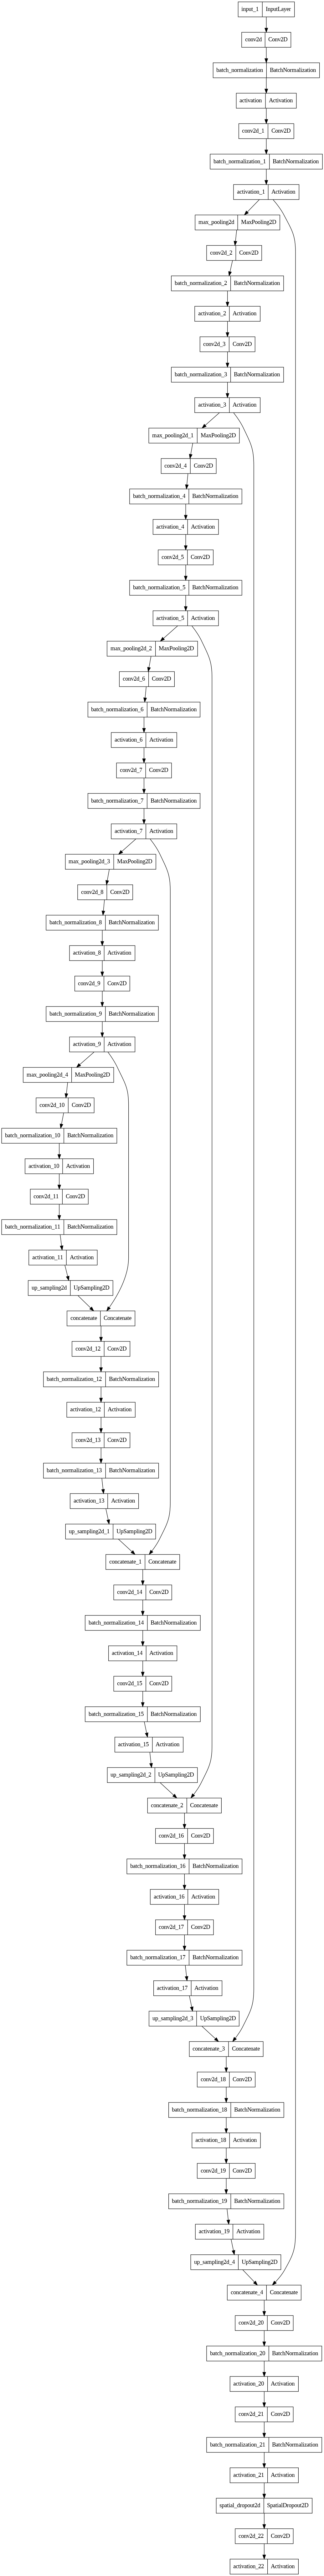

In [ ]:
keras.utils.plot_model(model)

In [ ]:
out_model_path = 'model.h5'
epochs = 100
patience = 10
batch_size = 8
learning_rate = 0.001


optim = Adam(learning_rate=learning_rate)
model.compile(optimizer=optim, loss=dice_coef_loss, metrics=[dice_coef,"accuracy"])

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-9, min_delta=0.00001, verbose=1, mode='min'),
    EarlyStopping(monitor='val_loss', patience=patience, verbose=0),
    ModelCheckpoint('zf_unet_224_temp.h5', monitor='val_loss', save_best_only=True, verbose=0),
]

In [ ]:
input_images_train = np.concatenate([input_images[:200]], axis=0 )
masked_labels_train = np.concatenate([masked_labels[:200]], axis=0 )
masked_labels_train = np.expand_dims(masked_labels_train, axis=-1)

In [ ]:
masked_labels_train.shape

(200, 224, 224, 1)

In [ ]:
model.fit(input_images_train, masked_labels_train, validation_split=0.1, epochs=epochs, verbose=2)

Epoch 1/100
6/6 - 7s - loss: -5.9117e-01 - dice_coef: 0.6426 - val_loss: -1.3901e-06 - val_dice_coef: 1.3901e-06 - 7s/epoch - 1s/step
Epoch 2/100
6/6 - 4s - loss: -9.5374e-01 - dice_coef: 0.9123 - val_loss: -1.3901e-06 - val_dice_coef: 1.3901e-06 - 4s/epoch - 703ms/step
Epoch 3/100
6/6 - 4s - loss: -1.1273e+00 - dice_coef: 1.1116 - val_loss: -1.3901e-06 - val_dice_coef: 1.3901e-06 - 4s/epoch - 689ms/step
Epoch 4/100
6/6 - 4s - loss: -1.0894e+00 - dice_coef: 1.0702 - val_loss: -1.3901e-06 - val_dice_coef: 1.3901e-06 - 4s/epoch - 695ms/step
Epoch 5/100
6/6 - 4s - loss: -1.2059e+00 - dice_coef: 1.2344 - val_loss: -1.3901e-06 - val_dice_coef: 1.3901e-06 - 4s/epoch - 699ms/step
Epoch 6/100
6/6 - 4s - loss: -1.2069e+00 - dice_coef: 1.1693 - val_loss: -8.3506e-01 - val_dice_coef: 0.8351 - 4s/epoch - 717ms/step
Epoch 7/100
6/6 - 4s - loss: -1.1067e+00 - dice_coef: 1.1148 - val_loss: -8.3506e-01 - val_dice_coef: 0.8351 - 4s/epoch - 711ms/step
Epoch 8/100
6/6 - 4s - loss: -1.2299e+00 - dice_coef

In [ ]:
model.save_weights(out_model_path)

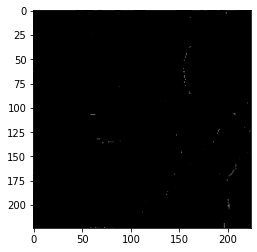

In [ ]:
plt.imshow(input_images[2])

1/1 [==============================] - 0s 17ms/step


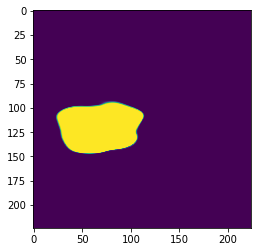

In [ ]:
pred = model.predict(np.array([input_images[2]]))
pred = np.squeeze(pred, axis=0)
pred = np.squeeze(pred, axis=-1)
plt.imshow(pred)

# Image size = 1536

In [ ]:
def ZF_UNET_1536(dropout_val=0.2, weights=None):
    inputs = Input((1536, 1536, INPUT_CHANNELS))
    axis = 3
    filters = 32

    conv_224 = double_conv_layer(inputs, filters)
    pool_112 = MaxPooling2D(pool_size=(2, 2))(conv_224)

    conv_112 = double_conv_layer(pool_112, 2*filters)
    pool_56 = MaxPooling2D(pool_size=(2, 2))(conv_112)

    conv_56 = double_conv_layer(pool_56, 4*filters)
    pool_28 = MaxPooling2D(pool_size=(2, 2))(conv_56)

    conv_28 = double_conv_layer(pool_28, 8*filters)
    pool_14 = MaxPooling2D(pool_size=(2, 2))(conv_28)

    conv_14 = double_conv_layer(pool_14, 16*filters)
    pool_7 = MaxPooling2D(pool_size=(2, 2))(conv_14)

    conv_7 = double_conv_layer(pool_7, 32*filters)

    up_14 = concatenate([UpSampling2D(size=(2, 2))(conv_7), conv_14], axis=axis)
    up_conv_14 = double_conv_layer(up_14, 16*filters)

    up_28 = concatenate([UpSampling2D(size=(2, 2))(up_conv_14), conv_28], axis=axis)
    up_conv_28 = double_conv_layer(up_28, 8*filters)

    up_56 = concatenate([UpSampling2D(size=(2, 2))(up_conv_28), conv_56], axis=axis)
    up_conv_56 = double_conv_layer(up_56, 4*filters)

    up_112 = concatenate([UpSampling2D(size=(2, 2))(up_conv_56), conv_112], axis=axis)
    up_conv_112 = double_conv_layer(up_112, 2*filters)

    up_224 = concatenate([UpSampling2D(size=(2, 2))(up_conv_112), conv_224], axis=axis)
    up_conv_224 = double_conv_layer(up_224, filters, dropout_val)

    conv_final = Conv2D(OUTPUT_MASK_CHANNELS, (1, 1))(up_conv_224)
    conv_final = Activation('sigmoid')(conv_final)

    model = Model(inputs, conv_final, name="ZF_UNET_1536")

    if weights == 'generator' and axis == 3 and INPUT_CHANNELS == 3 and OUTPUT_MASK_CHANNELS == 1:
        weights_path = get_file(
            'zf_unet_224_weights_tf_dim_ordering_tf_generator.h5',
            ZF_UNET_224_WEIGHT_PATH,
            cache_subdir='models',
            file_hash='203146f209baf34ac0d793e1691f1ab7')
        model.load_weights(weights_path)

    return model


In [ ]:
model_1536 = ZF_UNET_1536(weights='generator')

In [ ]:
model_1536.summary()

Model: "ZF_UNET_1536"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1536, 1536,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, 1536, 1536,   896         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 1536, 1536,   128        ['conv2d[0][0]']                 
 alization)                     32)                                                    

In [ ]:
out_model_path = 'model_1536.h5'
epochs = 8
patience = 10
batch_size = 8
learning_rate = 0.001


optim = Adam(learning_rate=learning_rate)
model_1536.compile(optimizer=optim, loss=dice_coef_loss, metrics=[dice_coef])

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-9, min_delta=0.00001, verbose=1, mode='min'),
    EarlyStopping(monitor='val_loss', patience=patience, verbose=0),
    ModelCheckpoint('zf_unet_1536_temp.h5', monitor='val_loss', save_best_only=True, verbose=0),
]

In [ ]:
for i in range(len(input_images)):
  input_images[i] = cv2.resize(input_images[i], dsize=(0,0), fx=224/1516, fy=1536/1516)

In [ ]:
masked_labels = []

for i in range(len(labels)):
  mask = np.zeros((1536, 1536))
  for j in range(len(labels[i]['shapes'])):
    points = []
    for point in labels[i]['shapes'][j]['points']:
      points.append([int((point[0] - 74) * (224/1516)), int((point[1] - 74) * (1536/1516))])
    cv2.fillPoly(mask, pts=[np.array(points)], color=(255, 255, 255))

  masked_labels.append(mask)

In [ ]:
input_images_train = np.concatenate([input_images[:200]], axis=0 )
masked_labels_train = np.concatenate([masked_labels[:200]], axis=0 )
masked_labels_train = np.expand_dims(masked_labels_train, axis=-1)

# Testing

In [ ]:
model = ZF_UNET_224(weights='generator')
model.load_weights('model.h5')

In [ ]:
out_model_path = 'model.h5'
epochs = 100
patience = 10
batch_size = 8
learning_rate = 0.001


optim = Adam(learning_rate=learning_rate)
model.compile(optimizer=optim, loss=dice_coef_loss, metrics=[dice_coef])

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-9, min_delta=0.00001, verbose=1, mode='min'),
    EarlyStopping(monitor='val_loss', patience=patience, verbose=0),
    ModelCheckpoint('zf_unet_224_temp.h5', monitor='val_loss', save_best_only=True, verbose=0),
]

In [ ]:
index = 2

In [ ]:
reference = images[index]
  
pattern_name = labels[index]['pattern']
pattern_img = None
for j in range(len(pattern_path)):
  if pattern_path[j].split('/')[-1] == pattern_name:
    pattern_img = patterns[j]
    source = pattern_img
    matched = match_histograms(source, reference, multichannel=True)
    break

In [ ]:
deg = find_keypoints(images[index], matched)

In [ ]:
scale = 1516/5000
resized_pat = cv2.resize(matched, dsize=(0,0), fx=scale, fy=scale)

In [ ]:
rotated_pat = rotate_image(resized_pat, deg)

In [ ]:
img = images[index]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
bin1 = cv2.adaptiveThreshold(img,100,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,5)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))


pat = cv2.cvtColor(rotated_pat, cv2.COLOR_BGR2GRAY )
bin2 = cv2.adaptiveThreshold(pat,100,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,5)

eroded = cv2.erode(bin2,kernel,iterations=5)
eroded2 = cv2.erode(eroded,kernel2,iterations=3)
dilate = cv2.dilate(eroded2,kernel)
opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel2,iterations=2)

temp = cv2.subtract(opening, bin1)
temp = cv2.resize(temp, dsize=(0,0), fx=224/1516, fy=224/1516)

input_image = cv2.cvtColor(temp, cv2.COLOR_GRAY2BGR)

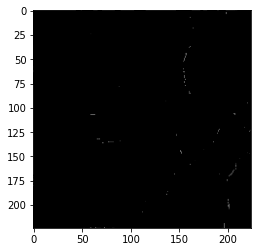

In [ ]:
plt.imshow(input_image)

In [ ]:
mask = np.zeros((224, 224))
for j in range(len(labels[index]['shapes'])):
  points = []
  for point in labels[index]['shapes'][j]['points']:
    points.append([int((point[0] - 74) * (224/1516)), int((point[1] - 74) * (224/1516))])
  cv2.fillPoly(mask, pts=[np.array(points)], color=(255, 255, 255))

masked_label = mask

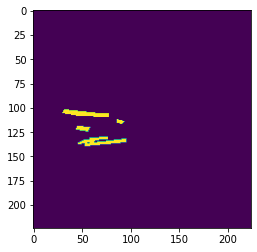

In [ ]:
plt.imshow(masked_label)

1/1 [==============================] - 2s 2s/step


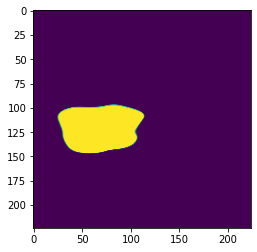

In [ ]:
pred = model.predict(np.array([input_image]))
pred = np.squeeze(pred, axis=0)
pred = np.squeeze(pred, axis=-1)
plt.imshow(pred)